In [1]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

In [2]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

In [3]:
train_paths = glob('fastcampus/dataset/mnist_png/training/*/*.png')
test_paths = glob('fastcampus/dataset/mnist_png/testing/*/*.png')

len(train_paths), len(test_paths)

(60000, 10000)

# Preprocess

In [4]:
class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):

        self.data_paths = data_paths
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path).convert("L")
        label = int(path.split('\\')[-2])
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
data_loader = torch.utils.data.DataLoader(
    Dataset(train_paths, 
            transforms.Compose([
                transforms.RandomHorizontalFlip(), 
                transforms.ToTensor(), 
                transforms.Normalize(
                    mean=[0.406], 
                    std=[0.225])])
           ),
    batch_size=batch_size, 
    shuffle=True
)

# Understand Better

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
path = '아이린.jpg'

In [10]:
image = Image.open(path)

https://pytorch.org/docs/stable/torchvision/transforms.html

In [11]:
import torchvision

In [12]:
np.array(image).shape

(452, 398, 3)

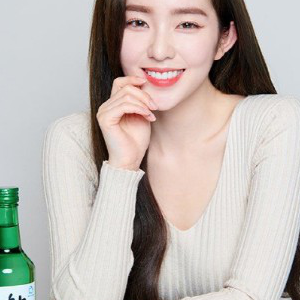

In [13]:
torchvision.transforms.CenterCrop(size=(300, 300))(image)
# 이미지 가운데부분만 추리기

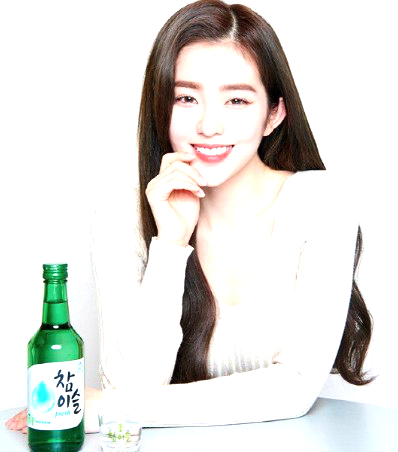

In [31]:
torchvision.transforms.ColorJitter(brightness=1, contrast=0, saturation=0, hue=0)(image)
# 실행할때마다 brightness를 바꿔줌 random하게 (1,0으로 조절가능)

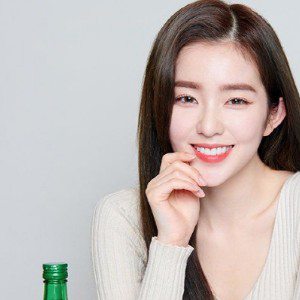

In [37]:
torchvision.transforms.FiveCrop(size=(300, 300))(image)[0] 
# fivecrop은 이미지를 대략 5부분으로 잘라서 보여줌. 뒤 0~4로 조절 가능

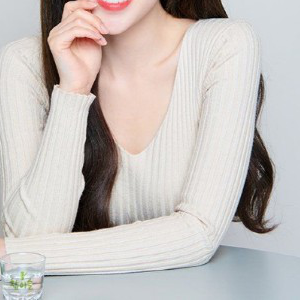

In [38]:
torchvision.transforms.FiveCrop(size=(300, 300))(image)[3]

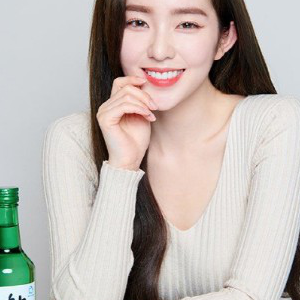

In [39]:
torchvision.transforms.FiveCrop(size=(300, 300))(image)[4]

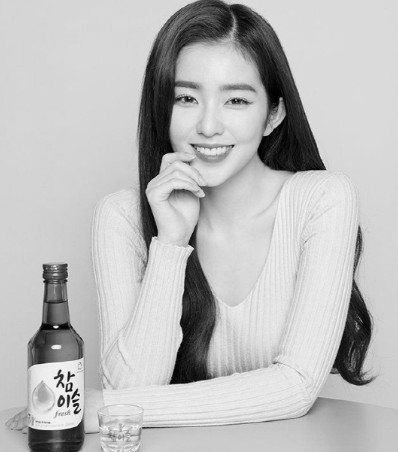

In [40]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

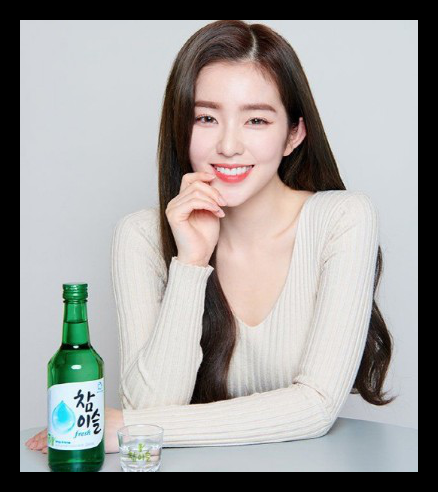

In [41]:
torchvision.transforms.Pad(padding=(20, 20), fill=0, padding_mode='constant')(image)
# 패딩을 통해 외곽부분 마감처리

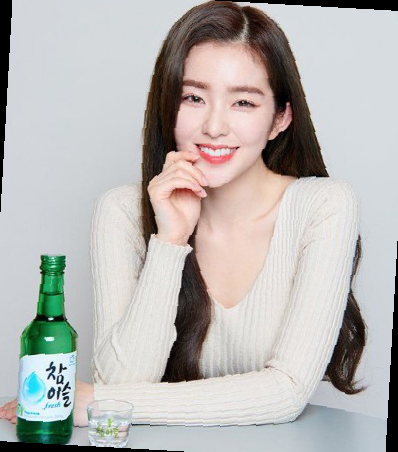

In [20]:
torchvision.transforms.RandomAffine(degrees=90, translate=None, scale=None, shear=None, resample=False, fillcolor=0)(image)

In [21]:
transforms = [torchvision.transforms.Grayscale(num_output_channels=1),
              torchvision.transforms.CenterCrop(size=(500, 500)),
              torchvision.transforms.RandomAffine(degrees=90, translate=None, scale=None, shear=None, resample=False, fillcolor=0)]

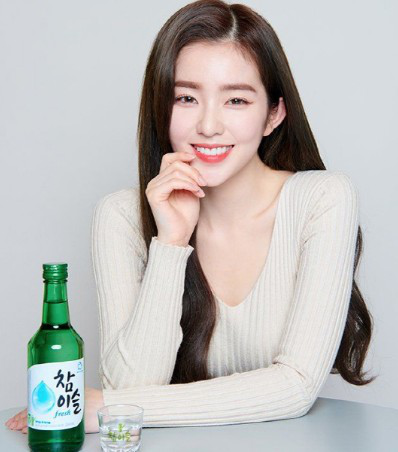

In [22]:
torchvision.transforms.RandomApply(transforms, p=0.5)(image)

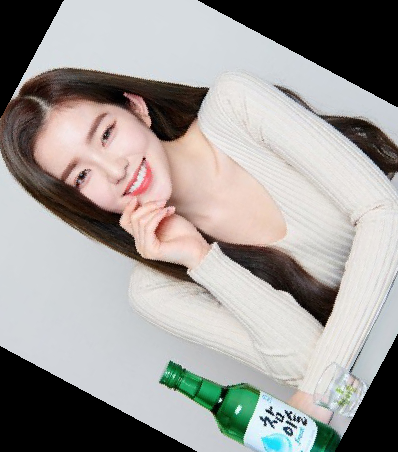

In [42]:
torchvision.transforms.RandomChoice(transforms)(image)

In [43]:
torchvision.transforms.RandomCrop(size=(500, 500), padding=None, pad_if_needed=False, fill=0, padding_mode='constant')(image)

ValueError: empty range for randrange() (0,-47, -47)

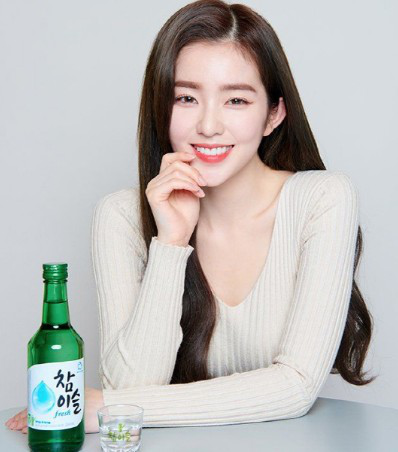

In [44]:
torchvision.transforms.RandomGrayscale(p=0.5)(image)

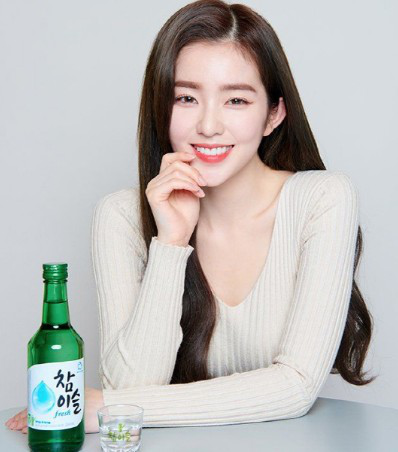

In [45]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)(image)

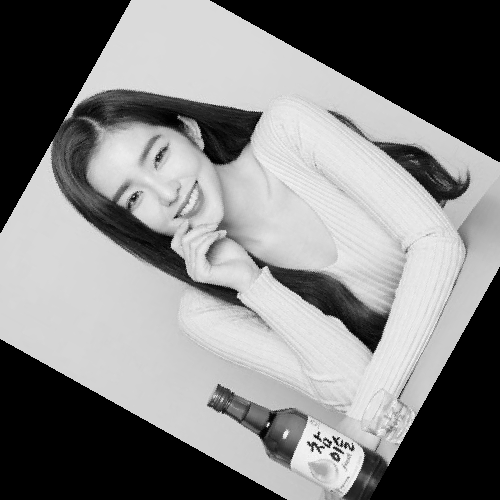

In [46]:
torchvision.transforms.RandomOrder(transforms)(image)

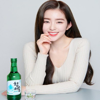

In [47]:
torchvision.transforms.Resize((100, 100), interpolation=Image.BICUBIC)(image)

# Transform on Tensor

In [48]:
tensor_image = torchvision.transforms.ToTensor()(image)

In [49]:
trf_image = torchvision.transforms.Normalize(mean=(0,0,0), std=(1,1,1), inplace=False)(tensor_image)

trf_image = trf_image.numpy()

print('Min:', np.min(trf_image), 
      ', Max:', np.max(trf_image), 
      ', Mean:', np.mean(trf_image), 
      ', Std:', np.std(trf_image))

Min: 0.0 , Max: 1.0 , Mean: 0.7352506 , Std: 0.235944


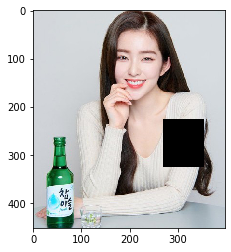

In [55]:
trf_image = torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)(tensor_image)
plt.imshow(trf_image.numpy().transpose(1, 2, 0))
plt.show()